# Cuve fitting
Curve fitting or Data fitting is the method of finding an expression that describes a given data set.
In general, data fitting, or curve fitting can be devided into *local* and *global* fits, with a *global* fitting refering to a single function in the independant variable that fully discribes the data that is being fit. A *local* fitting refers to a function that only locally describes the data set being fit in a few points. 

<img src="https://ipython-books.github.io/pages/chapter09_numoptim/03_curvefitting_files/03_curvefitting_14_0.png" width="400" height="400" />


# Interpolation: Lagrange Interpolation
One method of finding a expression for a given data set is the Lagrange interpolation technique. This method involves approximating a given data set locally by an $n$-*th* order polynomial $f(x)$, with $$n=N-1,$$ where $N$ is the number of data points in the given data set.

We have that:

$$
\begin{equation}
f(x)=y_{1}\lambda_{1}+y_{2}\lambda_{2}+...+y_{N}\lambda_{N},
\label{Lag}
\tag{1}
\end{equation}
$$

with:

$$
\begin{equation}
\lambda_{i}=\Pi^{n}_{j=1, j\neq i}\frac{x-x_{j}}{x_{i}-x_{j}}.
\label{Lam}
\tag{2}
\end{equation}
$$



One short comming of interpiolation techniques such as Lagrange Interpolation is that though the technique produces an expression that acurately fits all the data points in the given data set when applied to large data sets, the resulting expression can be very complex and oscillate between the various data points that can produce unphysical descriptions of the data, as can be seen in the left most graph in the following image:

<img src="https://github.com/PieterVDMerwe/Computational-rescources/blob/master/Interpolation.png?raw=true" width="400" height="400" />

This problem is further amplified if there are errors on the data in the data set.

# Curve fitting:Cubic Spline
One possible solution to the the previously stated short comming of the interpolation techniques, is to break up the data set into small segments that can be interpolated locally (with each $i$-th segment containing four of the points in the data set). 

Let $f(x)$ be the exact expression that describes the data set and $f_{i}(x)$ the approximate values given in th data set. The Cubic Splines method is then described by the following equations: 

$$
\begin{equation}
f(x) \approx f_{i}(x),
\label{Spline1}
\tag{3}
\end{equation}
$$

on the interval $x_{i}\leq x \leq x_{i+1}$, where this interval represents every four data points in the data set and 

$$
\begin{equation}
f_{i}(x)=y_{i}+\sum^{3}_{n=1}\frac{f^{(n)}_{i}(x-x_{i})^{n}}{n!}.
\label{Spline2}
\tag{4}
\end{equation}
$$

In equation $\eqref{Spline2}$ $y_{i}=f(x_{i})$ and $f^{(n)}=\frac{d^{n}f}{dx^{n}}$. To ensure that there are no discontinuity in the expression we require that :
$$
\begin{equation}
f_{i}(x_{i+1})=f_{i+1}(x_{i+1}),\ \ \ \ \ i=[1,N-1].
\label{Spline3}
\tag{5}
\end{equation}
$$


To further improve upon this, we can require that the first, second and third derivatives of consecutive segments be equal on the boundry between segments:

$$
\begin{equation}
f^{(n)}_{i}(x_{i+1})=f^{(n)}_{i+1}(x_{i+1}),\ \ \ \ n=1,2,3.
\label{Spline4}
\tag{6}
\end{equation}
$$

The derivative to each order is calculated numerically using the finite difference method from the derivatives of on order down:

$$
\begin{equation}
f^{(n+1)}_{i}=\frac{f^{(n)}_{i+1}-f^{(n)}_{i}}{x_{i+1}-x_{i}},\ \ \ n=0,1,2.
\label{Spline5}
\tag{7}
\end{equation}
$$

At the boundaries of the data set, we can use the forward and backward methods to calculate the derivatives in at each boundary, or set the derivatives equal to zero, which is known as a natural spline or clamped spline.

Solving these sets of equations for each segment, we can get a piecewise expression for the data set.

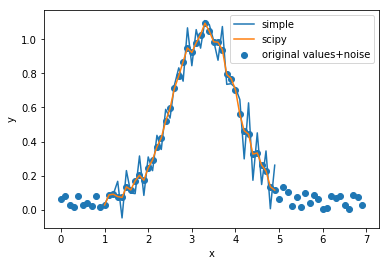

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy import interpolate as intr

def cubicSpline(x,y):
    h = [];
    for i in range(len(x)-1):
        h.append(x[i+1]-x[i]);
    alpha = [];
    for i in range(1,len(x)-1):
        alpha.append((3.0/h[i])*(y[i+1]-y[i])-(3.0/h[i-1])*(y[i]-y[i-1]));
    l=[1.0];
    mu=[0.0];
    z=[0.0];
    for i in range(1,len(x)-1):
        l.append(2.0*(x[i+1]-x[i-1])-h[i-1]*mu[i-1]);
        mu.append(h[i]/l[i]);
        z.append((alpha[i-1]-h[i-1]*z[i-1])/l[i]);
    l.append(1.0);
    z.append(0.0);
    c = np.zeros(len(x));
    b = np.zeros(len(x));
    d = np.zeros(len(x));
    for i in range(1,len(x)):
        j = len(x)-1-i;
        c[j]=z[j]-mu[j]*c[j+1];
        b[j]=(y[j+1]-y[j])/h[j] - h[j]*(c[j+1]+2.0*c[j])/3.0;
        d[j]=(c[j+1]-c[j])/(3.0*h[j]);
    return y, b, c, d;

def genFunc(xval,x,y,b,c,d):
    i = 0;
    while (xval > x[i])and(i<len(x)-1):
        i = i+1;
    return y[i]+b[i]*(xval-x[i])+c[i]*(xval-x[i])**(2.0)+d[i]*(xval-x[i])**(3.0);

def f(x):
    return 1.0*np.exp(-1.0*(x-3.3)**2)+0.0001*np.asanyarray(random.sample(range(0,1000),len(x)));
def scif(x,xp,yp):
    tck = intr.splrep(xp,yp);
    return intr.splev(x, tck);
    

x = np.arange(0.0,7.0,0.1);
y = f(x);

a,b,c,d = cubicSpline(x,y);

xx = np.arange(1.0,5.0,0.1);
yy = [];
yyy = [];
for i in range(len(xx)):
    yy.append(genFunc(xx[i],x,a,b,c,d));
    yyy.append(scif(xx[i],x,y));

plt.plot(xx,yy,label='simple');
plt.plot(xx,yyy,label='scipy');
plt.scatter(x,y,label='original values+noise');
plt.legend(ncol=1);
plt.xlabel('x');
plt.ylabel('y');
plt.savefig('cubic_spline.png');
plt.show();


# Example
In the following figure we have used a natural simple cubic spline program that generates a piecewise expression for a given data set and then uses it to fit arbitrary x values to. The program is, however, very sensitive to noise, as can be clearly seen. 

The second line shows the scipy cubic spline fiting method, which fits the given data quite well and is much less sensitive to noise.

<img src="https://github.com/PieterVDMerwe/Computational-rescources/blob/master/cubic_spline.png?raw=true" width="400" height="400" />